# **Pima Indians Diabetes Database Descriptive Statistics Project**
Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

## Introduction

Description of columns :

| Variable Name | Info about Variable |
| --- | --- |
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skin fold thickness (mm) |
| Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI | Body mass index (weight in kg/(height in m)^2) |
| DiabetesPedigreeFunction | Diabetes pedigree function |
| Age | Age in years |
| Outcome | 0 mean non-diabetic and 1 means diabetic |



In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# reading the file
df = pd.read_csv(r'C:\Users\ASUS\Desktop\python\dataset\odin_school\statistics\diabetes.csv')


### **Basic Exploration**

In [4]:
# to check how many rows and columns data has
df.shape 

(768, 9)

In [5]:
print(f'The data we have has:\n {df.shape[0]} observations \n {df.shape[1]} variables')

The data we have has:
 768 observations 
 9 variables


In [6]:
# to show top observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# to show bottom observations
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# to show some statistics properties of data in each columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- some variable has 0 as minimum Glucose, BloodPressure, SkinThickness, Insulin, BMI which is not possible
- also outcome variable should be in category

In [9]:
# to show data types in each columns and if they have null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df['Outcome'] = df.Outcome.astype('category')

In [11]:
df.nunique() # no of unique values in each variable 

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

**checking for null values**

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- as we can see there is no NaN values but there are zeros in columns which is not possible so we can say that zero here is NaN values lets change them to NaN and check again

In [13]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[columns] = df[columns].replace({ 0:np.nan})

In [14]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

- now we can see how many missing values we have in each columns

**check for missing values percentage**

In [15]:
for i in columns:
    percentage = round(df[i].isna().sum()/len(df[i])*100,2)
    print(f'Missing Percentage of Column {i} - ', percentage )

Missing Percentage of Column Glucose -  0.65
Missing Percentage of Column BloodPressure -  4.56
Missing Percentage of Column SkinThickness -  29.56
Missing Percentage of Column Insulin -  48.7
Missing Percentage of Column BMI -  1.43


- for columns having less than 5% of missing values we can directly drop them 

In [16]:
df.dropna(subset=['Glucose'], how='all', inplace=True)

In [17]:
df.dropna(subset=['BloodPressure'], how='all', inplace=True)


In [18]:
df.dropna(subset=['BMI'], how='all', inplace=True)


In [19]:
# after dropping rechecking dataset shape
df.shape

(724, 9)

In [20]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
# checking statical measures again after declaring 0 as NaN values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,724.000000,724.000000,724.000000,532.000000,392.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829
std,3.362803,30.750030,12.379870,10.523878,118.841690,6.888941,0.332315,11.765393
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,22.000000,76.750000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.500000,32.400000,0.379000,29.000000
75%,6.000000,142.000000,80.000000,36.000000,190.000000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### **Central of tendency for Glucose and Outcome**

**For Glucose**

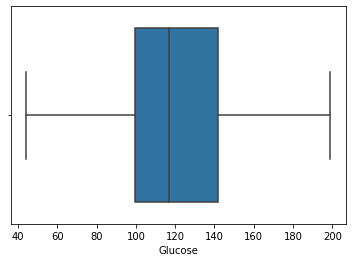

In [22]:
# we have already clear missing values for glucose lets check if we have any outliers 
sns.boxplot(data=df,x='Glucose')
plt.show()

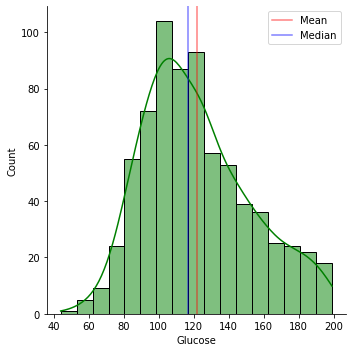

In [23]:
# we don't have any outliers now let see for distribution 
sns.displot(x = 'Glucose', data=df, kde=True, color='g')
plt.axvline(df.Glucose.mean(), color = 'r', alpha=0.5, label= 'Mean')
plt.axvline(df.Glucose.median(), color = 'b',alpha=0.5, label= 'Median')
plt.legend()
plt.show()

In [24]:
# Glucose measures
print('Mean     :',round(df.Glucose.mean(),2))
print('Median   :',round(df.Glucose.median(),2))
print('Skewness :',round(df.Glucose.skew(),2))

Mean     : 121.88
Median   : 117.0
Skewness : 0.53


- skewness lies between 0.5 - 1
- which means it's moderately skewed
- therefore we will consider mean as a central tendency as we don't have outliers also means mean is not affected by outliers in this case

In [25]:
print('Mean of Glucose', round(df.Glucose.mean(),2))

Mean of Glucose 121.88


**For Outcome**
- as 'outcome' it is binomial data 
- so mode will be appropriate for central of tendency

In [26]:
print('Mode of Outcome', df['Outcome'].mode())


Mode of Outcome 0    0
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]


### **Statistical Measures for variables**


In [27]:
df.describe(include='number')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,724.000000,724.000000,724.000000,532.000000,392.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829
std,3.362803,30.750030,12.379870,10.523878,118.841690,6.888941,0.332315,11.765393
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,22.000000,76.750000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.500000,32.400000,0.379000,29.000000
75%,6.000000,142.000000,80.000000,36.000000,190.000000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<function matplotlib.pyplot.show(close=None, block=None)>

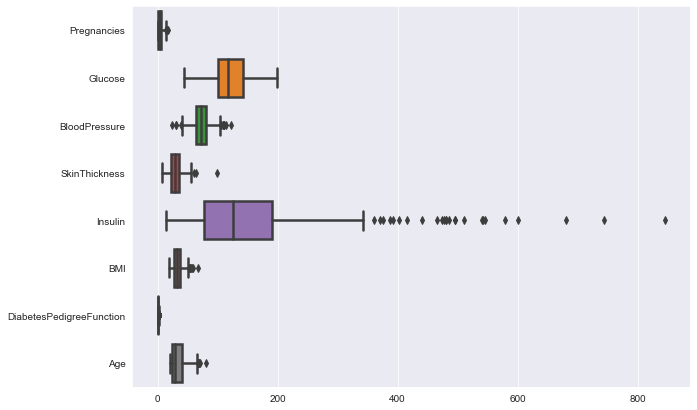

In [28]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.boxplot(data=df,orient='h', linewidth=2.5)
plt.show

### **Relationship between Age and Glucose**

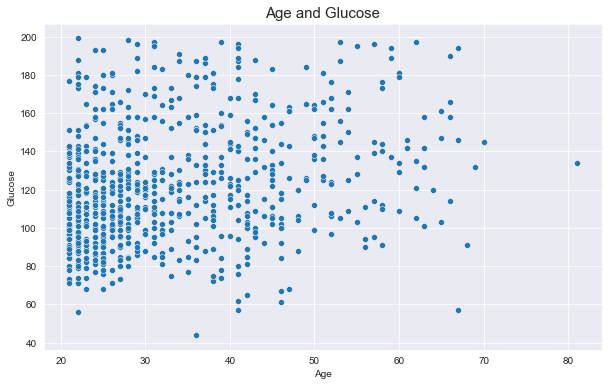

In [29]:
plt.figure(figsize=(10,6))
plt.title('Age and Glucose', fontsize = 15)
sns.scatterplot(data=df, y='Glucose', x='Age')
plt.show()

- here we can see that 20-30 has more density and they mostly lies in normal glucose level

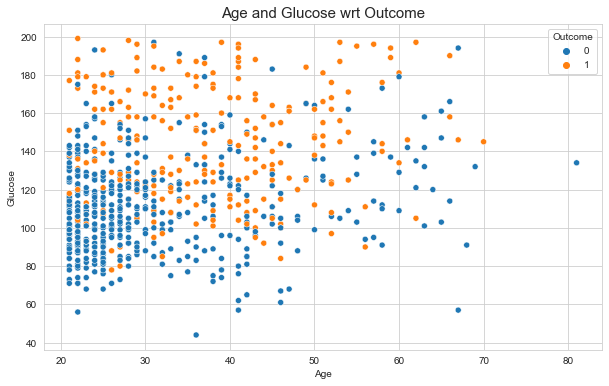

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Age and Glucose wrt Outcome', fontsize = 15)
sns.scatterplot(data=df, y='Glucose', x='Age', hue='Outcome')
plt.show()

- those who actually have glucose are more dense in high glucose level 

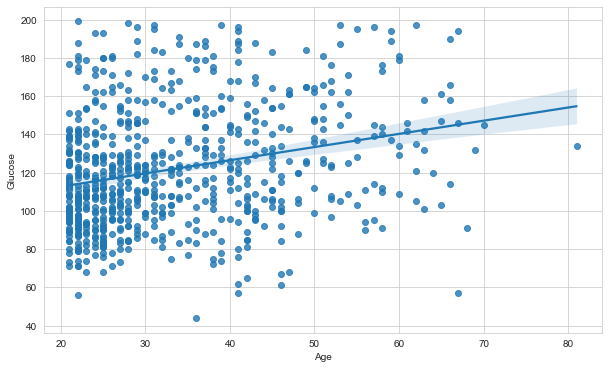

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Age', y='Glucose')
plt.show()

- as age is increasing glucose level is more likely to get increase 

### **Distribution of Outcome variable**

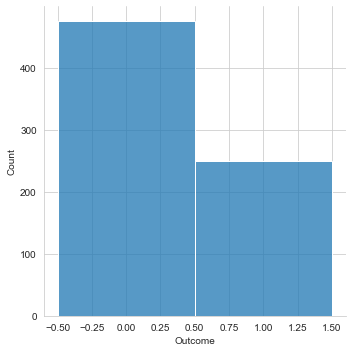

In [32]:
sns.displot(data=df, x='Outcome')
plt.show()

- here we can see 0 is higher in comparison to 1 
- means we have more non-diabetic in this data set

### **Distribution of numerical data**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               724 non-null    int64   
 1   Glucose                   724 non-null    float64 
 2   BloodPressure             724 non-null    float64 
 3   SkinThickness             532 non-null    float64 
 4   Insulin                   392 non-null    float64 
 5   BMI                       724 non-null    float64 
 6   DiabetesPedigreeFunction  724 non-null    float64 
 7   Age                       724 non-null    int64   
 8   Outcome                   724 non-null    category
dtypes: category(1), float64(6), int64(2)
memory usage: 67.9 KB


In [34]:
columns = list(df.columns)
columns.pop()
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [59]:
def displot(df, var):
    plt.figure(figsize=(10,7))
    sns.displot(data=df, x= var, bins = 10, kde = True)
    plt.axvline(x=df[var].mean(),color='red',alpha=0.5, label='Mean')
    plt.axvline(x=df[var].median(),color='blue',alpha=0.5, label='Median')
    plt.title(f'Distribution of {var}')
    plt.legend()
    plt.show()

<Figure size 720x504 with 0 Axes>

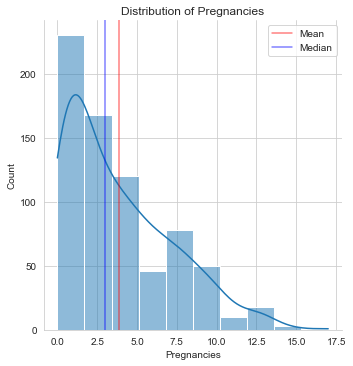

In [60]:
displot(df, 'Pregnancies')

<Figure size 720x504 with 0 Axes>

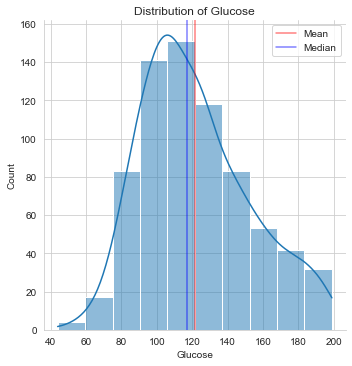

In [61]:
displot(df, 'Glucose')

<Figure size 720x504 with 0 Axes>

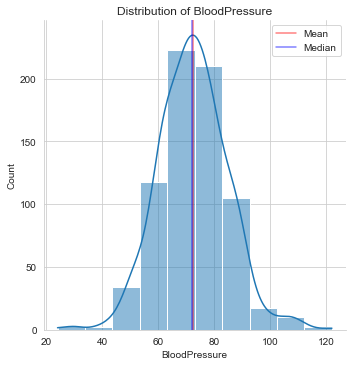

In [62]:
displot(df, 'BloodPressure')

<Figure size 720x504 with 0 Axes>

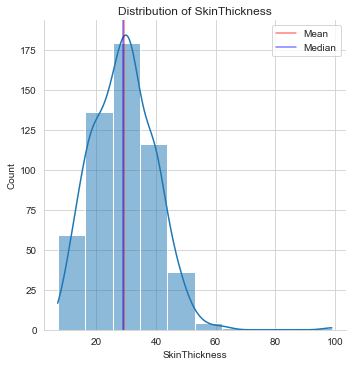

In [63]:
displot(df, 'SkinThickness')

<Figure size 720x504 with 0 Axes>

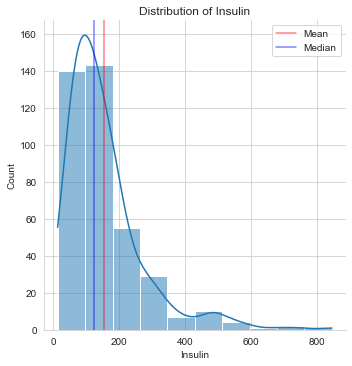

In [64]:
displot(df, 'Insulin')

<Figure size 720x504 with 0 Axes>

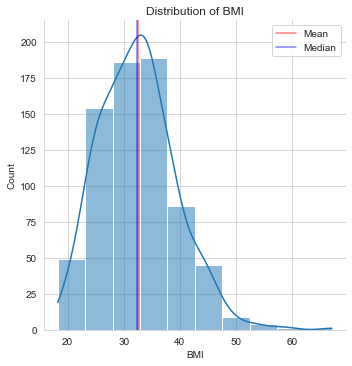

In [65]:
displot(df, 'BMI')

<Figure size 720x504 with 0 Axes>

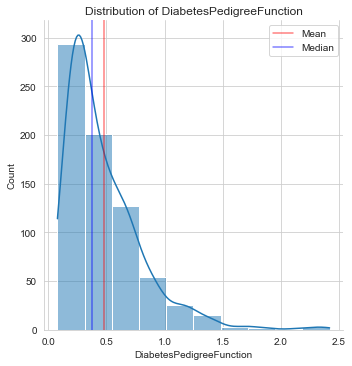

In [66]:
displot(df,  'DiabetesPedigreeFunction')

<Figure size 720x504 with 0 Axes>

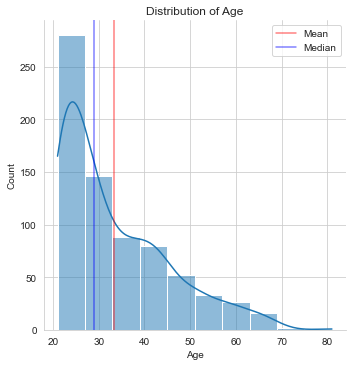

In [67]:
displot(df,  'Age')

| Variable | Distribution |
| --- | --- |
| Pregnancies | right-skewed |
| Glucose | normally distributed |
| BloodPressure | normally distributed |
| Insulin | right-skewed |
| BMI | normally distributed |
| Pedigree | right-skewed |
| Age | right-skewed |



### **Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed**


| Skewness| Value |
| --- | --- |
| symmetrical | -0.5 to 0.5 |
| moderate | -0.5 to -1 or 0.5 to 1.0|
| highly | less than -1 or greater than 1|


In [36]:
skew_dic = {}
for i in columns:
    skew = round(df[i].skew(), 2)
    skew_dic[i] = skew
skew_dic

{'Pregnancies': 0.91,
 'Glucose': 0.53,
 'BloodPressure': 0.14,
 'SkinThickness': 0.69,
 'Insulin': 2.17,
 'BMI': 0.6,
 'DiabetesPedigreeFunction': 1.92,
 'Age': 1.09}

| **Variable** | **Skewness** | **Type** |
| --- | --- | --- |
| Pregnancies | 0.91 | moderate |
| Glucose | 0.53 | symmetrical |
| BloodPressure | 0.14 | symmetrical |
| SkinThickness | 0.69 | moderate |
| Insulin | 2.17 | highly |
| BMI | 0.6 | moderate |
| DiabetesPedigreeFunction | 1.92 | highly |
| Age | 1.09 | highly |

    8. Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.


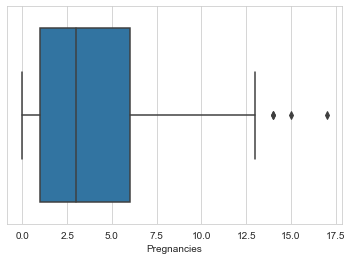

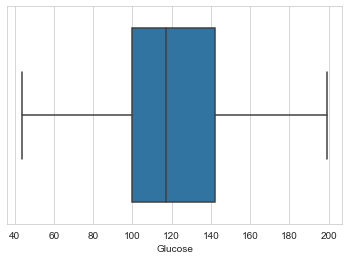

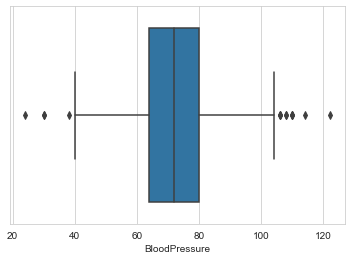

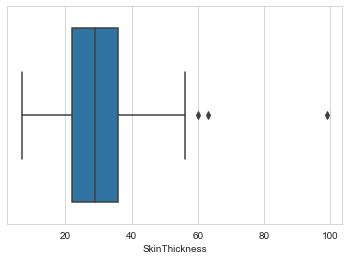

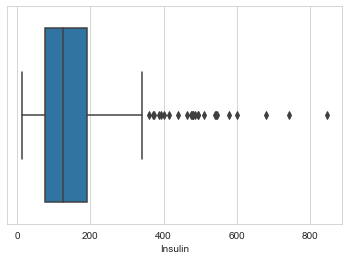

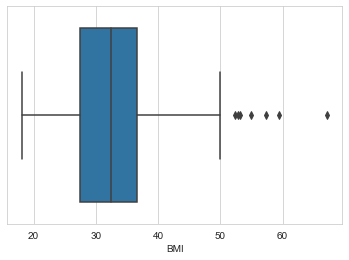

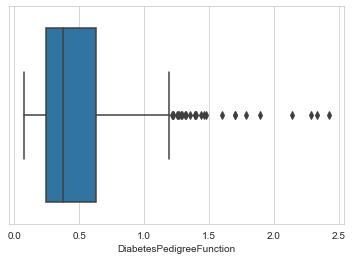

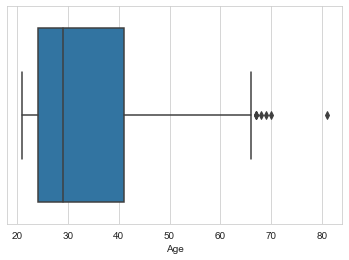

In [37]:
for i in columns:
    sns.boxplot(data=df, x = i, orient='h')
    plt.show()

| **Variable** | **Have Outliers** |
| --- | --- |
| Pregnancies | True |
| Glucose | False |
| BloodPressure | True |
| SkinThickness | True |
| Insulin | True |
| BMI | True |
| DiabetesPedigreeFunction | True |
| Age | True |

    9. What should be the measures of central tendency and dispersion for skewed data? 

If we have a skewed distribution, the median is often the best measure of central tendency and IQR is best for dispersion as it is not influenced my outliers

As in this data set Insulin, DiabetesPedigreeFunction and Age is highly skewed 

In [38]:
from scipy import stats
high_skew_col = ['Insulin','DiabetesPedigreeFunction','Age']
for i in high_skew_col:
    print(f'Median for {i} - ',df[i].median())
    print(f'IQR for {i} - ', stats.iqr(df[i]))

Median for Insulin -  125.5
IQR for Insulin -  nan
Median for DiabetesPedigreeFunction -  0.379
IQR for DiabetesPedigreeFunction -  0.38249999999999995
Median for Age -  29.0
IQR for Age -  17.0


In [39]:
corealtion = round(df.corr()*100,2)
corealtion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,100.00,13.49,20.97,9.51,7.90,1.23,-2.60,55.71
Glucose,13.49,100.00,22.33,22.66,58.12,22.33,13.66,26.36
BloodPressure,20.97,22.33,100.00,22.61,9.85,28.74,-0.01,32.49
SkinThickness,9.51,22.66,22.61,100.00,18.22,64.74,11.86,16.13
Insulin,7.90,58.12,9.85,18.22,100.00,22.64,13.59,21.71
BMI,1.23,22.33,28.74,64.74,22.64,100.00,15.49,2.08
DiabetesPedigreeFunction,-2.60,13.66,-0.01,11.86,13.59,15.49,100.00,2.31
Age,55.71,26.36,32.49,16.13,21.71,2.08,2.31,100.00


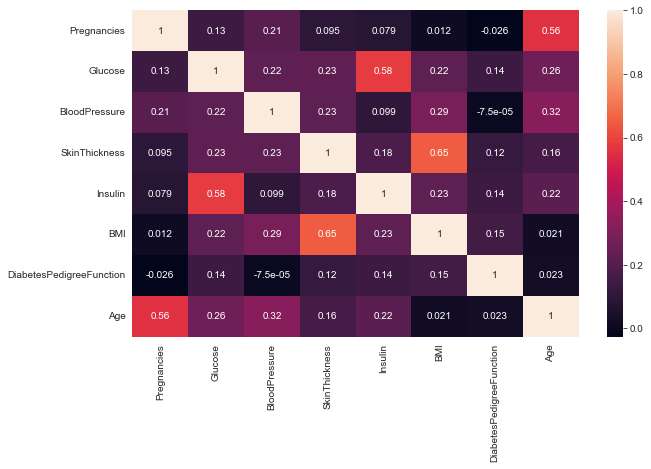

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(),annot=True)
plt.show()